In [0]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math
import nltk
from nltk import tokenize as tok
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
fp = open(r"data_nlp.txt").read()
ans = tok.sent_tokenize(fp)
Counter(ans)
len(ans)

206

In [0]:
wd = tok.word_tokenize(fp)
wd = [word for word in wd if word.isalpha()]
wd

['One',
 'dollar',
 'and',
 'cents',
 'That',
 'was',
 'all',
 'And',
 'sixty',
 'cents',
 'of',
 'it',
 'was',
 'in',
 'pennies',
 'Pennies',
 'saved',
 'one',
 'and',
 'two',
 'at',
 'a',
 'time',
 'by',
 'bulldozing',
 'the',
 'grocer',
 'and',
 'the',
 'vegetable',
 'man',
 'and',
 'the',
 'butcher',
 'until',
 'one',
 's',
 'cheeks',
 'burned',
 'with',
 'the',
 'silent',
 'imputation',
 'of',
 'parsimony',
 'that',
 'such',
 'close',
 'dealing',
 'implied',
 'One',
 'dollar',
 'and',
 'cents',
 'And',
 'the',
 'next',
 'day',
 'would',
 'be',
 'Christmas',
 'All',
 'he',
 'could',
 'think',
 'about',
 'was',
 'how',
 'it',
 'would',
 'all',
 'end',
 'There',
 'was',
 'still',
 'a',
 'bit',
 'of',
 'uncertainty',
 'in',
 'the',
 'equation',
 'but',
 'the',
 'basics',
 'were',
 'there',
 'for',
 'anyone',
 'to',
 'see',
 'No',
 'matter',
 'how',
 'much',
 'he',
 'tried',
 'to',
 'see',
 'the',
 'positive',
 'it',
 'was',
 'anywhere',
 'to',
 'be',
 'seen',
 'The',
 'end',
 'was',
 

In [0]:
Counter(wd).most_common()

[('the', 150),
 ('to', 108),
 ('was', 85),
 ('and', 78),
 ('of', 64),
 ('a', 63),
 ('that', 61),
 ('he', 51),
 ('it', 50),
 ('I', 40),
 ('had', 38),
 ('in', 37),
 ('she', 37),
 ('She', 32),
 ('but', 31),
 ('you', 29),
 ('her', 29),
 ('at', 28),
 ('be', 28),
 ('would', 27),
 ('could', 24),
 ('with', 21),
 ('He', 21),
 ('It', 20),
 ('for', 19),
 ('The', 19),
 ('did', 19),
 ('his', 18),
 ('all', 17),
 ('have', 16),
 ('on', 16),
 ('this', 16),
 ('is', 15),
 ('been', 14),
 ('them', 13),
 ('as', 13),
 ('they', 13),
 ('do', 13),
 ('him', 13),
 ('That', 12),
 ('time', 12),
 ('about', 12),
 ('what', 12),
 ('their', 12),
 ('There', 11),
 ('there', 11),
 ('way', 11),
 ('if', 11),
 ('were', 10),
 ('get', 10),
 ('down', 10),
 ('not', 10),
 ('one', 9),
 ('how', 9),
 ('which', 9),
 ('something', 9),
 ('out', 9),
 ('just', 9),
 ('life', 9),
 ('no', 9),
 ('little', 8),
 ('from', 8),
 ('like', 8),
 ('up', 8),
 ('so', 8),
 ('day', 7),
 ('going', 7),
 ('should', 7),
 ('last', 7),
 ('even', 7),
 ('when', 7

In [0]:
add_stop_words = [word for word, count in Counter(wd).most_common() if count > 14]
add_stop_words

['the',
 'to',
 'was',
 'and',
 'of',
 'a',
 'that',
 'he',
 'it',
 'I',
 'had',
 'in',
 'she',
 'She',
 'but',
 'you',
 'her',
 'at',
 'be',
 'would',
 'could',
 'with',
 'He',
 'It',
 'for',
 'The',
 'did',
 'his',
 'all',
 'have',
 'on',
 'this',
 'is']

In [0]:
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

Text(0.5, 1.0, 'wordcloud')

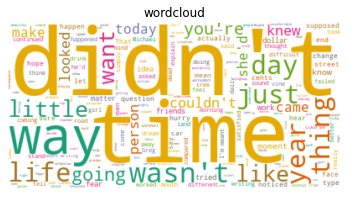

In [0]:
wc.generate(fp)
    
plt.plot()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('wordcloud')

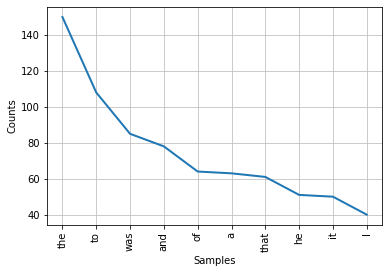

In [0]:
fd = nltk.FreqDist(wd)
fd.plot(10)

In [0]:
c = []
all_words = [word for word, count in Counter(wd).most_common()]
for i in range(len(all_words)):
  cnt = 0
  for j in range(len(ans)):
    if all_words[i] in ans[j].strip('.,').split():
      cnt += 1
  
  c.append(cnt)

print('-------------')

print(len(c))

-------------
965


In [0]:
invfreq = []
for i in range(len(c)):
  if c[i] > 0:
    invfreq.append(float(math.log(len(ans))) / float(c[i]))
  else:
    invfreq.append(0)

print(len(invfreq))


965


In [0]:
df = pd.DataFrame(list(zip(c,invfreq)), index = all_words, columns = ['count', 'invfreq']) 
df

,count,invfreq
the,98,0.054366
to,84,0.063427
was,63,0.084569
and,67,0.079521
of,53,0.100526
...,...,...
crept,1,5.327876
closer,1,5.327876
encouragement,1,5.327876
build,1,5.327876


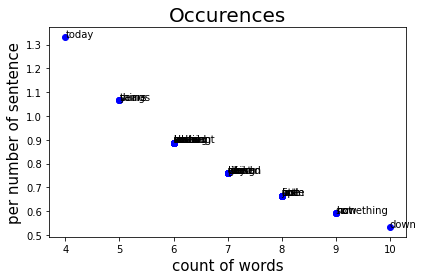

In [0]:
for i in range(50 ,90):
  plt.scatter(c[i], invfreq[i], color='blue')
  plt.annotate(all_words[i], (c[i], invfreq[i]))


plt.title('Occurences', fontsize=20)
plt.xlabel('count of words', fontsize=15)
plt.ylabel('per number of sentence', fontsize=15)

plt.tight_layout()

In [0]:
total = [1/count for word, count in Counter(wd).most_common()]
tf_idf = []
for i in range(len(invfreq)):
  tf_idf.append(total[i]*invfreq[i])

spell = [word for word, count in Counter(wd).most_common()]
imp = list(zip(spell, tf_idf))
imp

[('the', 0.00036244055569997156),
 ('to', 0.0005872879374768056),
 ('was', 0.0009949348587842354),
 ('and', 0.0010194941004189784),
 ('of', 0.001570718210138438),
 ('a', 0.0017259074080951025),
 ('that', 0.0017824945362293683),
 ('he', 0.002901893338120687),
 ('it', 0.0027322441891228623),
 ('I', 0.005549871009155814),
 ('had', 0.004673575586657527),
 ('in', 0.004363534945773613),
 ('she', 0.005759866128421169),
 ('She', 0.005370842912086272),
 ('but', 0.005544095909250345),
 ('you', 0.011482491743080993),
 ('her', 0.007654994495387329),
 ('at', 0.007318511220864809),
 ('be', 0.007318511220864809),
 ('would', 0.00939660699962889),
 ('could', 0.014799656024415502),
 ('with', 0.012081351856665716),
 ('He', 0.012685419449499002),
 ('It', 0.014799656024415504),
 ('for', 0.017525908449965728),
 ('The', 0.014758659747339559),
 ('did', 0.14020726759972582),
 ('his', 0.01741136002872412),
 ('all', 0.019587780032314636),
 ('have', 0.022199484036623255),
 ('on', 0.020812016284334302),
 ('this', 

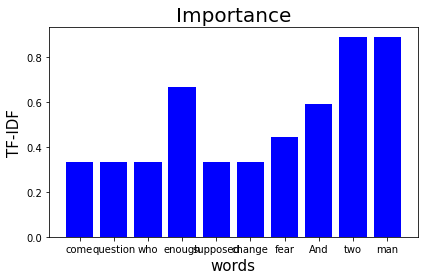

In [0]:
for i in range(130 ,140):
  plt.bar(spell[i], tf_idf[i], color='blue')

plt.title('Importance', fontsize=20)
plt.xlabel('words', fontsize=15)
plt.ylabel('TF-IDF', fontsize=15)
plt.tight_layout()